In [1]:
import os
import sys
sys.path.append('../..')
import glob
import time
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean
from numba import float64, guvectorize
import cimf as c
from ddxddy import ddxND, ddyND
%load_ext autoreload
%autoreload 2

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.rcParams['font.cursive'] = ['Helvetica-Oblique']
plt.rcParams['pdf.fonttype'] = 42

In [2]:
dsm = xarray.open_dataset('lg2meaneddy.nc')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


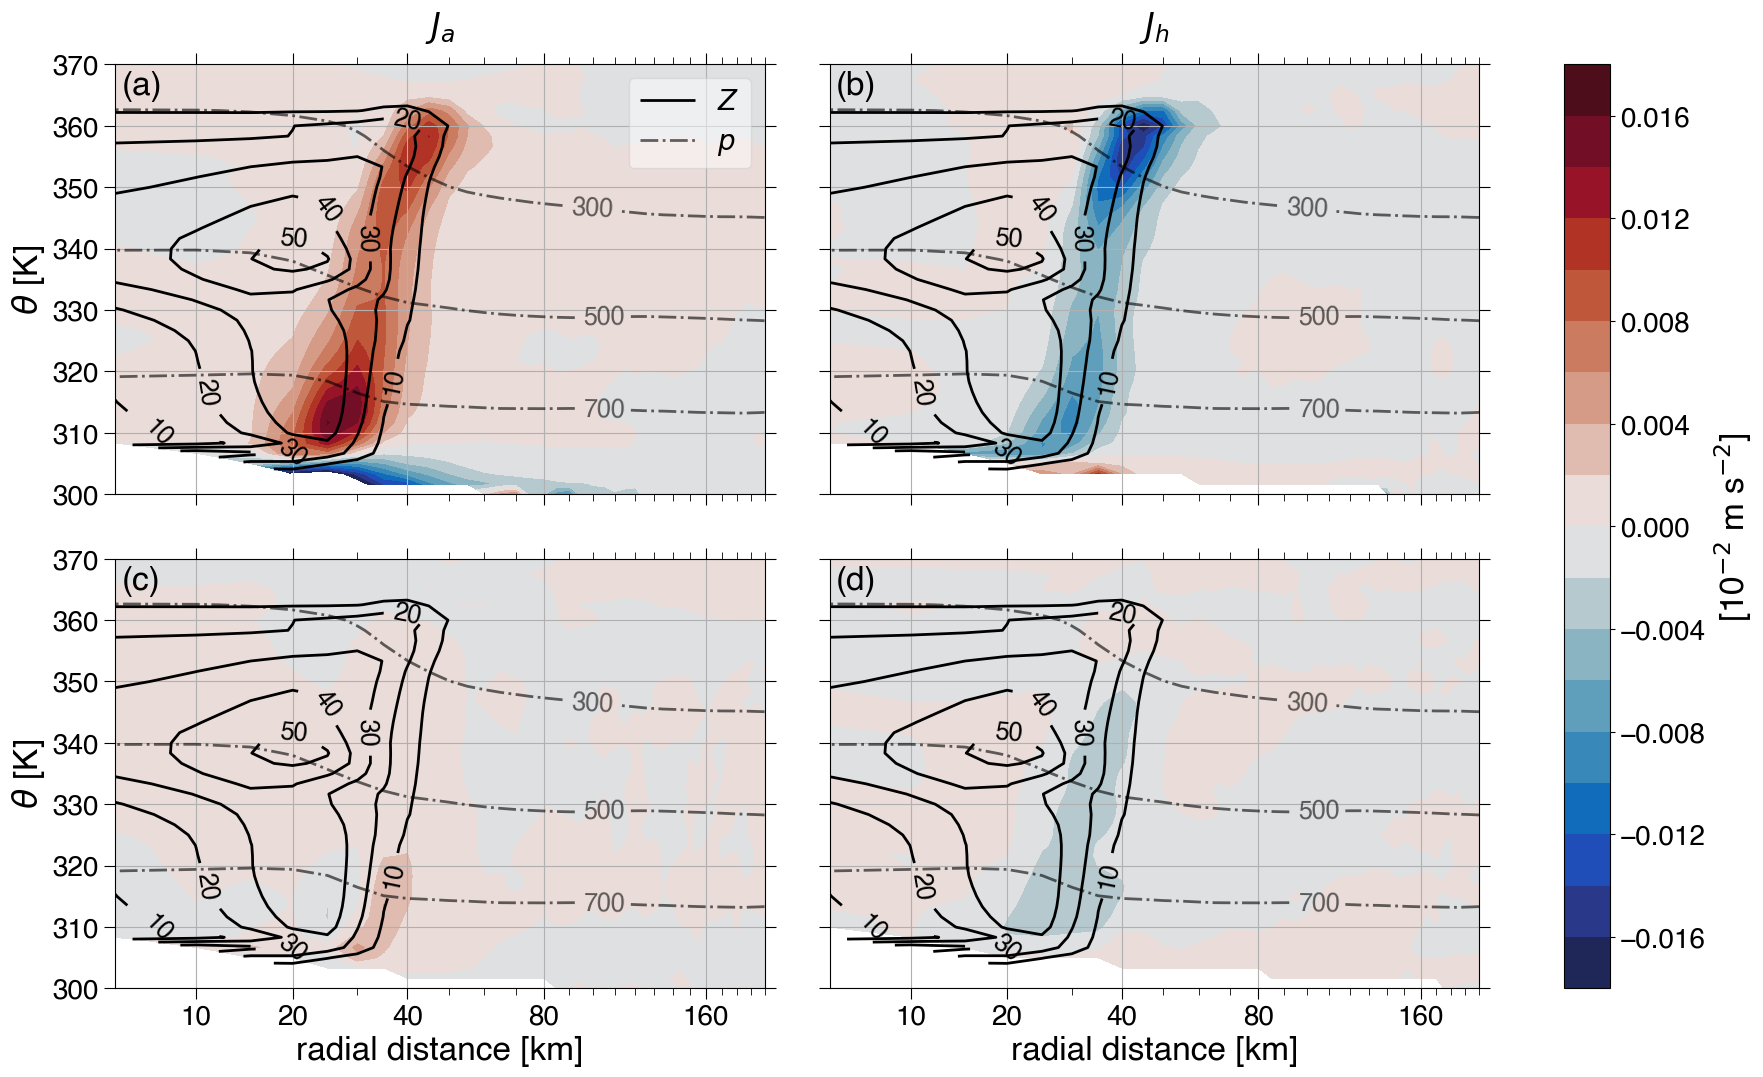

In [18]:
rz_range = {'r':slice(5000,200000), 'z':slice(3,47)}
dsms = dsm.sel(rz_range)
dsms['PV'] = dsms.eta / dsms.sigma

#------------------ general properties ------------------
xticks = np.array([10,20,40,80,160]) * 1000
xticklabels = ['10','20','40','80','160']
xticksminor = np.arange(10,201,10) * 1000
ticklabelsize = 20
ticklength = 8
minorticklength = 5
labelsize = 24
clabelsize = 18

fig, ax = plt.subplots(2,2,sharey=True, sharex=True, figsize=(22,12))
Jkwargs = {'levels':np.linspace(-0.018,0.018,19), 'cmap':cmocean.cm.balance}
Pkwargs = {'levels':np.array([100,300,500,700]), 'linewidths':2, 'colors':'k', 'alpha':0.6, 'linestyles':'dashdot'}
PVkwargs = {'levels':np.arange(10,56,10), 'linewidths':2, 'colors':'k'}


ax1, ax2, ax3, ax4 = ax.flat

# vorticity flux plots
p1 = ax1.contourf(dsms.r, dsms.theta, dsms.Ja_m, **Jkwargs)
p2 = ax2.contourf(dsms.r, dsms.theta, dsms.Jh_m, **Jkwargs)
p3 = ax3.contourf(dsms.r, dsms.theta, dsms.Ja_e, **Jkwargs)
p4 = ax4.contourf(dsms.r, dsms.theta, dsms.Jh_e, **Jkwargs)

for axi,lbl in zip(ax.flat, ['(a)','(b)','(c)','(d)']):
    pp = axi.contour(dsms.r, dsms.theta, dsms.pres/100, **Pkwargs)
    pZ = axi.contour(dsms.r, dsms.theta, dsms.PV*1e6, **PVkwargs)
    axi.clabel(pp, inline=True, inline_spacing=30, fontsize=clabelsize, fmt="%d")
    axi.clabel(pZ, inline=True, inline_spacing=6, fontsize=clabelsize, fmt="%d")
    axi.tick_params(top=True, right=True, labelsize=ticklabelsize, length=ticklength)
    axi.tick_params(axis='x', top=True, which='minor', length=minorticklength)
    axi.grid()
    axi.text(5300,365,lbl, fontsize=labelsize)

h11 = pp.legend_elements()[0][0]
h12 = pZ.legend_elements()[0][0]
ax1.legend(handles=[h12,h11],labels=['$Z$','$p$'],fontsize=ticklabelsize,loc='upper right', framealpha=0.5)
ax1.set_xscale('function', functions=(lambda x: x**(1/4), lambda x: x**(4)))
ax1.set_xticks(xticks, labels=xticklabels)
ax1.set_xticks(xticksminor, minor=True)
ax1.set_xlim([5000,200000])
ax1.set_ylim([300,370])
ax1.set_ylabel(r'$\theta$ [K]', fontsize=labelsize)
ax3.set_ylabel(r'$\theta$ [K]', fontsize=labelsize)
ax3.set_xlabel('radial distance [km]', fontsize=labelsize)
ax4.set_xlabel('radial distance [km]', fontsize=labelsize)
ax1.set_title('$J_a$', fontsize=labelsize, pad=20)
ax2.set_title('$J_h$', fontsize=labelsize, pad=20)

plt.subplots_adjust(wspace=0.1, hspace=0.15)
cb = fig.colorbar(p1, ax=ax.ravel().tolist())
cb.ax.tick_params(labelsize=ticklabelsize)
cb.ax.set_ylabel(r'[10$^{-2}$ m s$^{-2}$]', fontsize=labelsize)

fig.savefig('fig08.pdf', dpi=300, bbox_inches='tight')